# Machine Learning on Text: Clustering Assignment

In [3]:
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

C:\Users\jonat\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
def preprocess(docs):
    lemmatizer = WordNetLemmatizer()
    stemmer = SnowballStemmer('english')
    preprocessed = []
    
    for doc in docs:
        tokenized = word_tokenize(doc)
        cleaned = [stemmer.stem(lemmatizer.lemmatize(token.lower()))
                  for token in tokenized
                  if not token.lower() in stopwords.words('english')
                  if token.isalpha()]
        untokenized = " ".join(cleaned)
        preprocessed.append(untokenized)
    return preprocessed

In [13]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jonat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jonat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jonat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

### Ingest the company_profiles data set into a corpus.

### Create a list of documents by extracting the raw text for each fileid in the corpus.

In [6]:
PATH = r'C:\Users\jonat\Desktop\company_profiles'
DOC_PATTERN = r'.*\.txt'
corpus = PlaintextCorpusReader(PATH, DOC_PATTERN)
docs = [corpus.raw(fileid) for fileid in corpus.fileids()]

### Preprocess the documents, including the steps below.

- Word tokenize the document.
- Lowercase all tokens.
- Lemmatize and stem the tokens.
- Remove stop words and punctuation.

In [14]:
pre_processed = preprocess(docs)

### TF-IDF vectorize the preprocessed documents.

In [16]:
vectorizer = TfidfVectorizer(
    max_df=0.5, min_df=2, use_idf=True, norm=u'l2', smooth_idf=True)

vectorized = vectorizer.fit_transform(pre_processed)

### Determine the optimal number of clusters using the Yellowbrick library's KElbow Visualizer and a KMeans clustering algorithm.

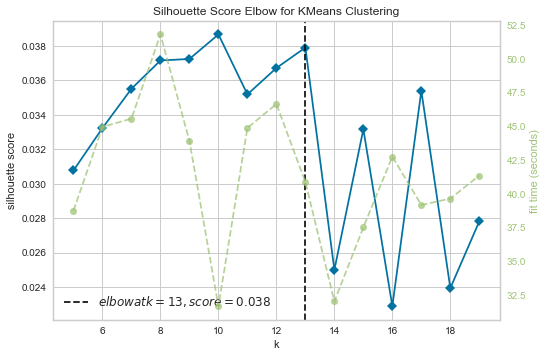

In [19]:
model = KMeans()
visualizer = KElbowVisualizer(model, k = (5,20), metric = 'silhouette')
visualizer.fit(vectorized)
visualizer.show()

### Perform K-Means Clustering using the optimal number of clusters determine in the previous step.

In [21]:
model = KMeans(n_clusters = 10)
clusters = model.fit_predict(vectorized)

### Perform Agglomerative Clustering using the same number of clusters.

In [23]:
model = AgglomerativeClustering(n_clusters = 10)
clusters = model.fit_predict(vectorized.toarray())

### Choose one of the three topic modeling approaches covered. Cluster into the optimal number of clusters and extract 5 keywords that represent the documents in each cluster.

In [25]:
from sklearn.decomposition import TruncatedSVD
num_keywords = 5
num_topics = 10

vectorizer = TfidfVectorizer()
model = TruncatedSVD(n_components = num_topics)
vectorized = vectorizer.fit_transform(pre_processed)
model.fit_transform(vectorized)


results = [[(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-num_keywords- 1:-1]] for topic in model.components_]
topics = [[x[0] for x in i] for i in results]

In [26]:
topics

[['loan', 'servic', 'bank', 'compani', 'product'],
 ['loan', 'bank', 'deposit', 'account', 'estat'],
 ['gas', 'natur', 'oil', 'energi', 'texa'],
 ['invest', 'fund', 'incom', 'manag', 'equiti'],
 ['treatment', 'phase', 'clinic', 'trial', 'develop'],
 ['servic', 'manag', 'insur', 'solut', 'gas'],
 ['insur', 'store', 'product', 'properti', 'liabil'],
 ['insur', 'segment', 'life', 'system', 'liabil'],
 ['properti', 'real', 'estat', 'insur', 'reit'],
 ['servic', 'electr', 'segment', 'generat', 'facil']]